In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [12]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [13]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


In [14]:
train_data.columns

Index(['id', 'budget', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date',
       ...
       'departments_Art', 'departments_Crew', 'departments_Writing',
       'departments_Costume & Make-Up', 'departments_Camera',
       'departments_Directing', 'departments_Editing',
       'departments_Visual Effects', 'departments_Lighting',
       'departments_Actors'],
      dtype='object', length=203)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 203 entries, id to departments_Actors
dtypes: float64(2), int64(188), object(13)
memory usage: 4.6+ MB


In [16]:
train_data.describe()

,id,budget,popularity,runtime,revenue,has_collection,num_genres,genre_Drama,genre_Comedy,genre_Thriller,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,0.201333,2.503667,0.510333,0.342667,0.263000,...,2.689667,2.438333,2.189000,2.05200,1.808000,1.651333,1.502667,1.197000,0.434333,0.001333
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,0.401063,1.117021,0.499977,0.474680,0.440336,...,4.038993,6.129115,1.597956,3.51142,2.560597,1.353653,1.726940,3.733475,1.235393,0.044709
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,0.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,0.000000,3.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,2.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000,7.000000,1.000000,1.000000,1.000000,...,28.000000,119.000000,20.000000,33.00000,23.000000,30.000000,14.000000,52.000000,12.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27b80ec710>]],
      dtype=object)

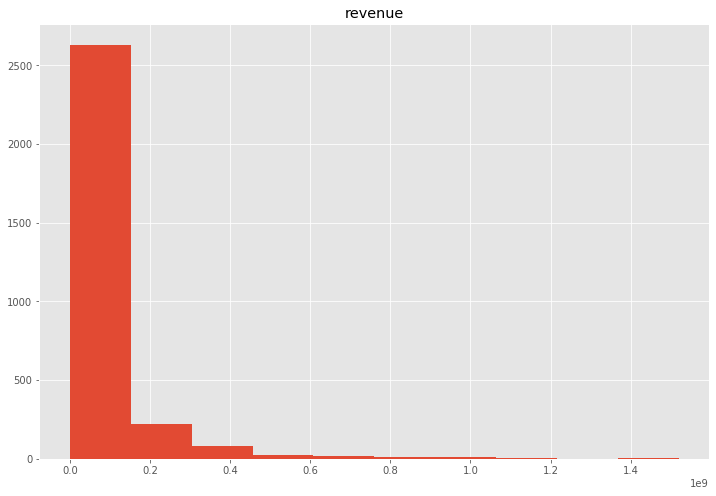

In [17]:
train_data.hist('revenue')

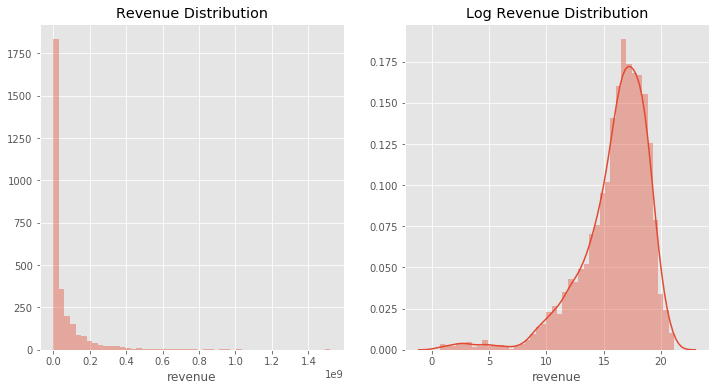

In [18]:
fig, ax = plt.subplots(figsize = (12,6))
plt.subplot(1,2,1) # 1 plot, 2 column, 1 row
sns.distplot(train_data['revenue'],kde=False)
plt.title('Revenue Distribution');
plt.subplot(1,2,2) # 1 plot, 2 column, 2nd Column
sns.distplot(np.log1p(train_data['revenue']),kde=True);
plt.title('Log Revenue Distribution');

In [19]:
train_data['log_revenue'] = np.log1p(train_data['revenue'])
train_data.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,4,2,13,8,4,2,4,4,0,16.326300
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,1,0,1,1,1,0,0,0,18.370959
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,9,1,5,4,3,6,3,1,0,16.387512
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,1,0,0,1,0,0,0,0,16.588099
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,1,0,0,1,0,0,0,0,15.182615


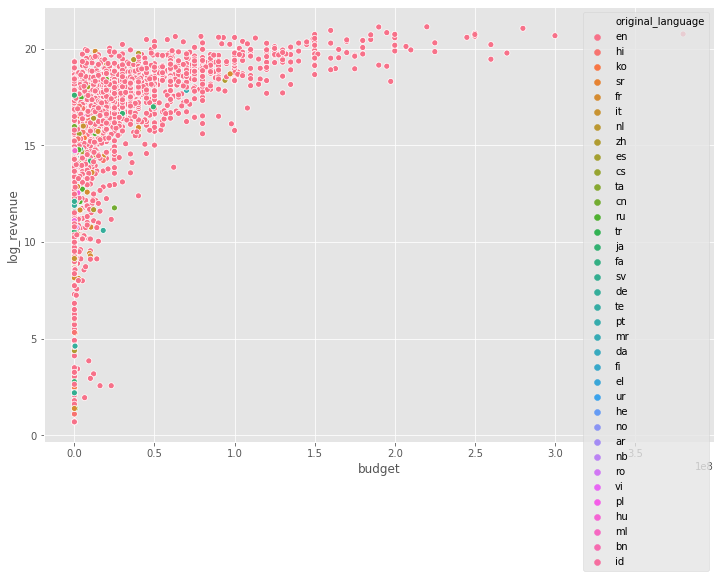

In [20]:
sns.scatterplot(train_data['budget'],train_data['log_revenue'],hue = train_data['original_language'])
plt.show()

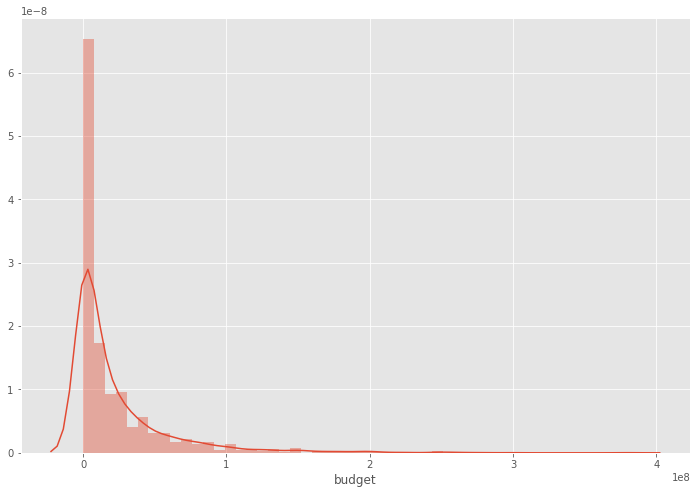

In [21]:
sns.distplot(train_data['budget'])

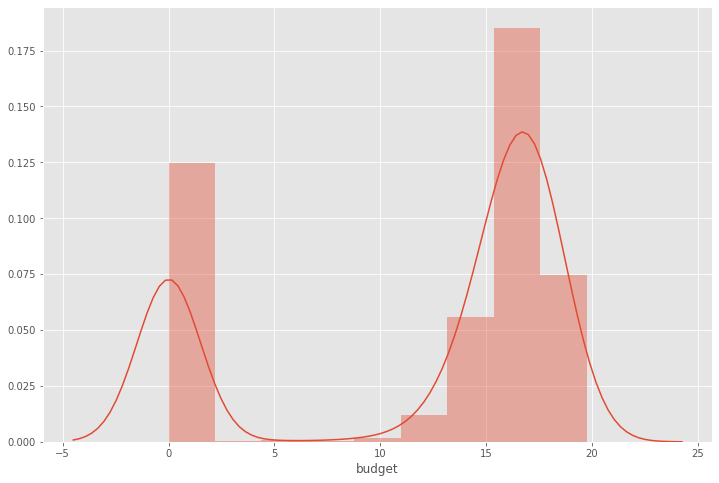

In [22]:
sns.distplot(np.log1p(train_data['budget']))

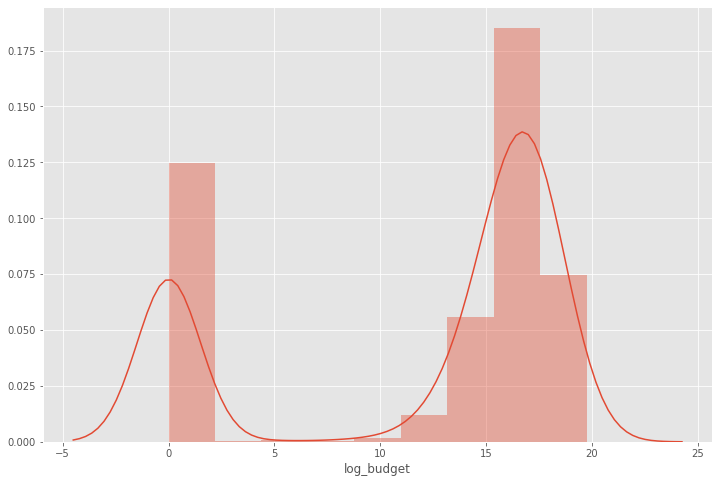

In [23]:
train_data['log_budget'] = np.log1p(train_data['budget'])
sns.distplot(train_data['log_budget'])

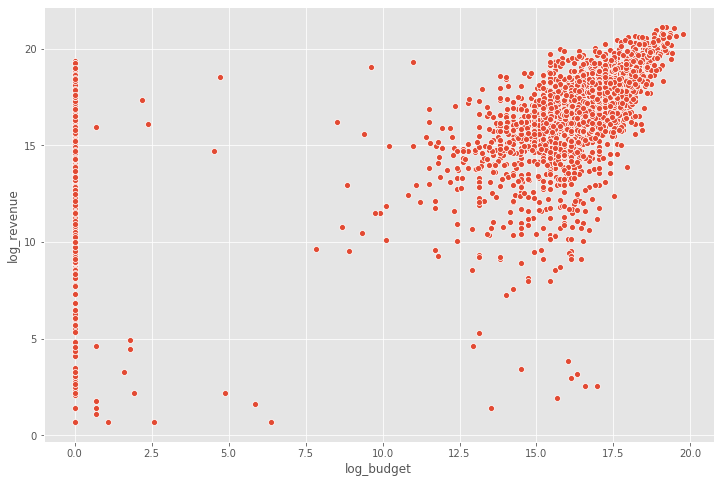

In [24]:
sns.scatterplot(train_data['log_budget'],train_data['log_revenue'])

In [25]:
train_data['has_homepage'] = 0

In [26]:
train_data.loc[train_data['homepage'].isnull()==False,'has_homepage'] = 1

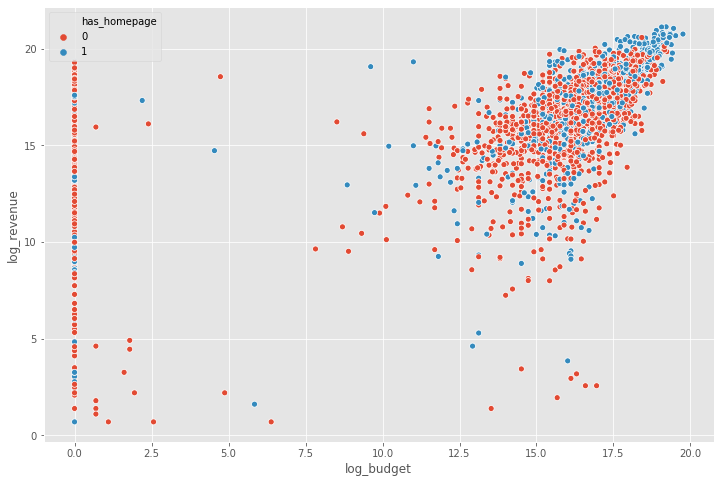

In [27]:
sns.scatterplot(train_data['log_budget'],train_data['log_revenue'],hue = train_data['has_homepage'])
plt.show()

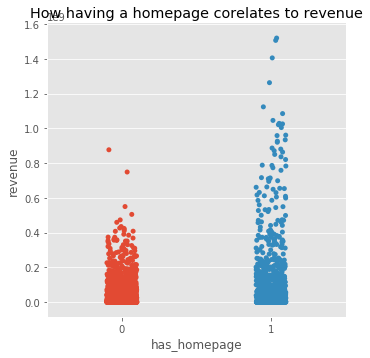

In [28]:
sns.catplot(x = 'has_homepage',y = 'revenue',data = train_data)
plt.title('How having a homepage corelates to revenue')
plt.show()

In [29]:
train_data['original_language'].value_counts().head(10)

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
Name: original_language, dtype: int64

In [30]:
train_top10 = train_data.loc[train_data['original_language'].isin(train_data['original_language'].value_counts().head(10).index)]

In [31]:
train_top10.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget,has_homepage
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,13,8,4,2,4,4,0,16.326300,16.454568,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,1,1,1,0,0,0,18.370959,17.504390,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,4,3,6,3,1,0,16.387512,15.009433,1
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,0,0,16.588099,13.997833,1
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,0,0,15.182615,0.000000,0


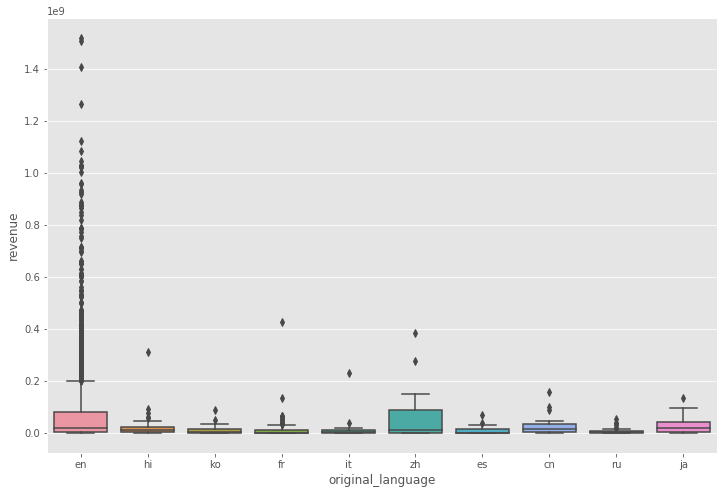

In [32]:
sns.boxplot(y = 'revenue',x='original_language',data = train_top10)

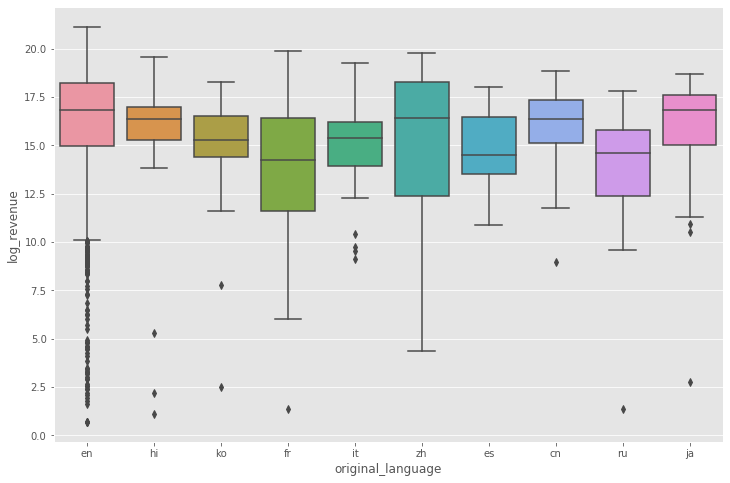

In [33]:
sns.boxplot(y = 'log_revenue',x='original_language',data = train_top10)

In [34]:
text = ' '.join(train_data['original_title'].values)

In [35]:
from wordcloud import * 

In [36]:
text.count('Hot')#use word cloud alternatively

6

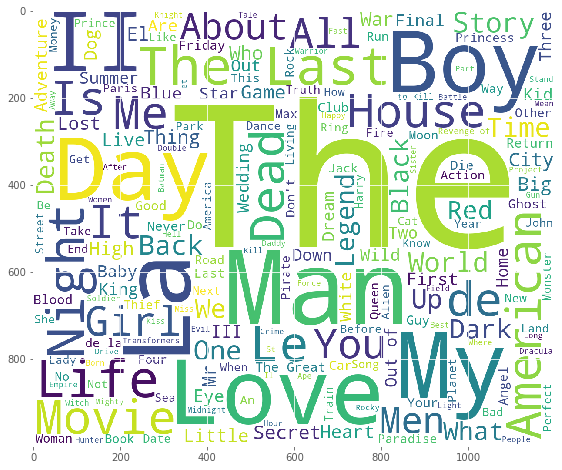

In [39]:
wc = WordCloud(max_font_size = None,
              background_color = 'white',
               width = 1200,
               height = 1000,
              ).generate(text)
plt.imshow(wc)

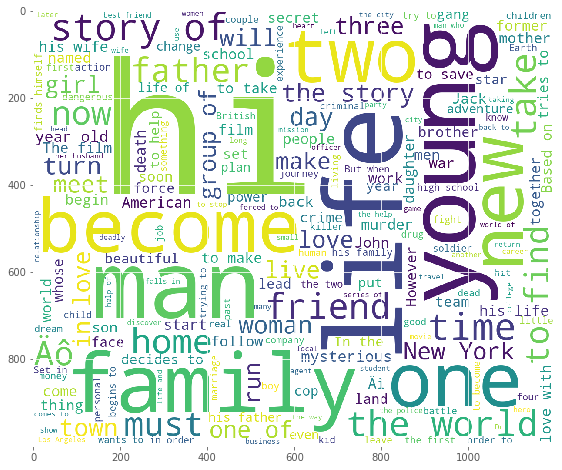

In [44]:
text = ' '.join(train_data['overview'].fillna('').values)
wc = WordCloud(max_font_size = None,
              background_color = 'white',
               width = 1200,
               height = 1000,
              ).generate(text)
plt.imshow(wc)

In [45]:
import eli5
from sklearn.linear_model import LinearRegression

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
  sublinear_tf = True,
  analyzer = 'word',
  token_pattern = r'\w{1,}',
  ngram_range = (1,2),
  min_df = 5
)

In [55]:
overview_fit = vectorizer.fit_transform(train_data['overview'].fillna(''))

In [56]:
model = LinearRegression()
model.fit(overview_fit,train_data['log_revenue'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
eli5.show_weights(model,vec = vectorizer,top = 20)